## Assignment 4
Overview :
<br>Use Netflix Movies and TV Shows dataset from Kaggle and perform following
operation :
1. Make a visualization showing the total number of movies watched by children
2. Make a visualization showing the total number of standup comedies
3. Make a visualization showing most watched shows.
4. Make a visualization showing highest rated show    

In [59]:
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_netflix = pd.read_csv('netflix_titles.csv')

In [18]:
df_netflix.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
1920,s1921,TV Show,Edgar Rice Burroughs' Tarzan and Jane,NaN,"Marci T. House, Michael Dobson, Omari Newton, ...",NaN,"October 12, 2018",2018,TV-Y7,2 Seasons,"Crime TV Shows, Kids' TV",Saved from a plane crash and given supernatura...,2018-10-12
7468,s7469,Movie,Walk. Ride. Rodeo.,Conor Allyn,"Spencer Locke, Missi Pyle, Sherri Shepherd, Ba...",United States,"March 8, 2019",2019,TV-PG,100 min,"Children & Family Movies, Dramas",In the wake of an accident that leaves her par...,2019-03-08
341,s342,TV Show,Aggretsuko,NaN,"Kaolip, Komegumi Koiwasaki, Maki Tsuruta, Soht...",Japan,"August 27, 2020",2020,TV-14,3 Seasons,"Anime Series, International TV Shows","Frustrated with her thankless office job, Rets...",2020-08-27
496,s497,Movie,An Ordinary Man,Brad Silberling,"Ben Kingsley, Hera Hilmar, Peter Serafinowicz","Serbia, United States","October 1, 2020",2017,R,91 min,"Dramas, Thrillers",A war criminal in hiding begins to suspect tha...,2020-10-01
7493,s7494,TV Show,Way Back into Love,NaN,"June Tsai, Ray Chang, Lung Shao-hua, Yi-Wen Ye...",Taiwan,"December 24, 2018",2011,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","After years in the U.S., a Taiwanese immigrant...",2018-12-24


In [19]:
df_netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
date            datetime64[ns]
dtype: object

In [20]:
df_netflix['date_added'] =df_netflix['date_added'].str.strip()

In [21]:
df_netflix['date'] = pd.to_datetime(df_netflix['date_added'], format="%B %d, %Y")

In [22]:
df_netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
date            datetime64[ns]
dtype: object

In [23]:
df_netflix.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


In [24]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   object        
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
 12  date          7777 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 791.0+ KB


In [25]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
date              10
dtype: int64

In [26]:
print(f"rows/instances: {df_netflix.shape[0]}")
print(f"\ncolumns/features: {df_netflix.shape[1]}")
print(f"\ncolumn names: {df_netflix.columns}")
print(f"\nTotal missing values: {df_netflix.isnull().values.sum()}")
print(f"\nUnique values: \n{df_netflix.nunique()}")

rows/instances: 7787

columns/features: 13

column names: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'date'],
      dtype='object')

Total missing values: 3641

Unique values: 
show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1512
release_year      73
rating            14
duration         216
listed_in        492
description     7769
date            1512
dtype: int64


## Visualization

## 1.Visualization showing the total number of movies watched by children

In [36]:
kids_filter_movie = df_netflix['listed_in'].str.contains("Children & Family Movies", case=False, regex=False)

kids_filter_tv = df_netflix['listed_in'].str.contains("Kids' TV", case=False, regex=False)
print(f"kids_filter: {type(kids_filter_tv)}\n{kids_filter_tv}")

kids_filter: <class 'pandas.core.series.Series'>
0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Name: listed_in, Length: 7787, dtype: bool


In [37]:
df_kids = df_netflix[kids_filter_movie | kids_filter_tv]

In [38]:
df_kids.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
108,s109,TV Show,3Below: Tales of Arcadia,NaN,"Tatiana Maslany, Diego Luna, Nick Offerman, Ni...",United States,"July 12, 2019",2019,TV-Y7,2 Seasons,"Kids' TV, TV Action & Adventure, TV Sci-Fi & F...","After crash-landing on Earth, two royal teen a...",2019-07-12
111,s112,TV Show,44 Cats,NaN,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,"October 1, 2020",2018,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020-10-01
113,s114,Movie,48 Christmas Wishes,"Marco Deufemia, Justin G. Dyck","Khiyla Aynne, Noah Dyer, Maya Franzoi, Clara K...",Canada,"December 20, 2017",2017,TV-G,84 min,"Children & Family Movies, Comedies",When a small town's letters to Santa accidenta...,2017-12-20
145,s146,Movie,A 2nd Chance,Clay Glen,"Nina Pearce, Adam Tuominen, Emily Morris, Amy ...",Australia,"July 1, 2017",2011,PG,95 min,"Children & Family Movies, Dramas, Sports Movies",A gymnast lacks the confidence she needs to re...,2017-07-01
147,s148,Movie,A Babysitter's Guide to Monster Hunting,Rachel Talalay,"Tamara Smart, Oona Laurence, Tom Felton, Troy ...",United States,"October 15, 2020",2020,TV-PG,99 min,Children & Family Movies,"Recruited by a secret society of babysitters, ...",2020-10-15


Movie      532
TV Show    414
Name: type, dtype: int64


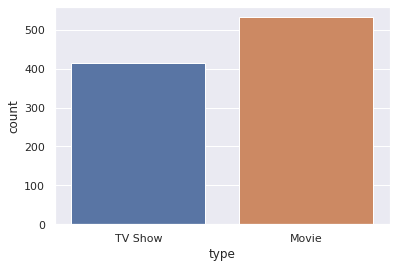

In [60]:
h = sns.countplot(x="type",
                data=df_kids)
print(df_kids["type"].value_counts())

## 2.Make a visualization showing the total number of standup comedies

In [49]:
df_netflix.listed_in.unique()

stand_up_filter = df_netflix['listed_in'].str.contains("Stand-Up Comedy", case=False, regex=False)
print(f"stand_up_filter: {type(stand_up_filter)}\n{stand_up_filter}")

stand_up_filter: <class 'pandas.core.series.Series'>
0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Name: listed_in, Length: 7787, dtype: bool


In [51]:
df_standup = df_netflix[stand_up_filter]
df_standup.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date
197,s198,TV Show,A Little Help with Carol Burnett,NaN,"Carol Burnett, Russell Peters, Mark Cuban, Tar...",United States,"May 4, 2018",2018,TV-G,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Carol Burnett returns to TV with a...,2018-05-04
220,s221,Movie,A Russell Peters Christmas,Henry Sarwer-Foner,"Russell Peters, Pamela Anderson, Michael Bublé...",Canada,"November 1, 2013",2011,NR,44 min,Stand-Up Comedy,"Inspired by the variety shows of the 1970s, ""A...",2013-11-01
284,s285,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa...",2017-08-04
305,s306,Movie,Adam Devine: Best Time of Our Lives,Jay Karas,Adam Devine,United States,"June 18, 2019",2019,TV-MA,59 min,Stand-Up Comedy,Frenetic comic Adam Devine talks teen awkwardn...,2019-06-18
307,s308,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,"October 23, 2018",2018,TV-MA,74 min,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San...",2018-10-23


Total StandUp comedy 381


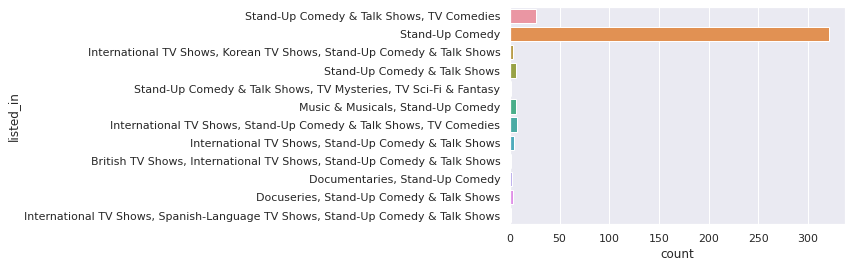

In [61]:
print("Total StandUp comedy",df_standup.shape[0])
i = sns.countplot(y="listed_in",data=df_standup);

## 3.Make a visualization showing most watched shows.

## 4.Make a visualization showing highest rated show

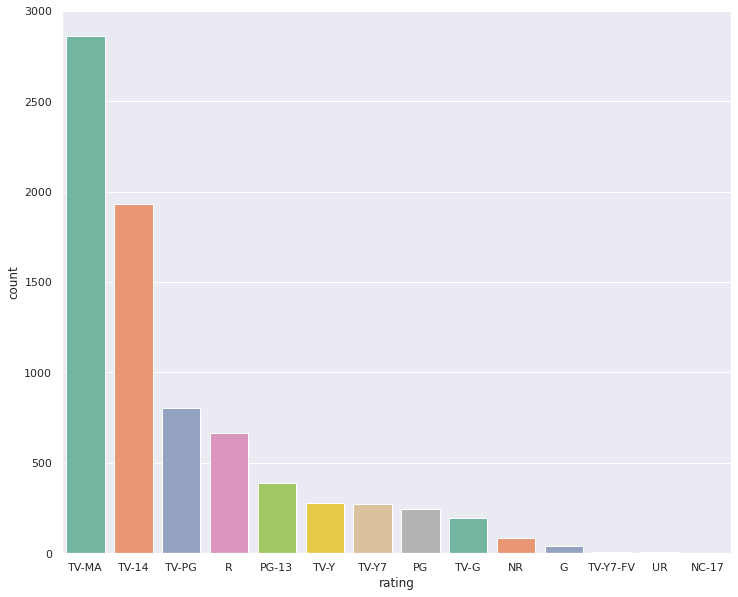

In [67]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=df_netflix, palette="Set2", order=df_netflix['rating'].value_counts().index[0:15])

The largest count of Netflix content is made with a “TV-14” rating. “TV-14” contains material that parents or adult guardians may find unsuitable for children under the age of 14. But the largest count of TV shows is made with a “TV-MA” rating. “TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.